<a href="https://colab.research.google.com/github/vipul43/project_MASK/blob/main/basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing dataset from kaggle
!pip install -q kaggle &> /dev/null
!mkdir ~/.kaggle &> /dev/null
!echo '{"username":"saivipul","key":"f4e9e153799bf7289426d9655d02fdca"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json &> /dev/null
# enter dataset API command below
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset &> /dev/null
!unzip face-mask-12k-images-dataset.zip &> /dev/null
!rm -rf face-mask-12k-images-dataset.zip &> /dev/null

# dataset is stored in 'Face Mask Dataset' folder

In [2]:
train_images_with_mask_path = '/content/Face Mask Dataset/Train/WithMask/'
train_images_without_mask_path = '/content/Face Mask Dataset/Train/WithoutMask/'

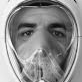

<class 'PIL.Image.Image'>
None
L
(82, 82)


In [3]:
# playing around with data
import numpy as np
from keras.preprocessing.image import load_img, img_to_array, array_to_img
image = load_img(train_images_with_mask_path+'10'+'.png', color_mode="grayscale", target_size=None, interpolation="nearest")
display(image)
print(type(image))
print(image.format)
print(image.mode)
print(image.size)

In [4]:
# converting image to vector
image_vec = img_to_array(image)
print(type(image_vec))
print(image_vec.dtype)
print(image_vec.shape)
print(image_vec)

<class 'numpy.ndarray'>
float32
(82, 82, 1)
[[[238.]
  [238.]
  [238.]
  ...
  [199.]
  [200.]
  [200.]]

 [[237.]
  [238.]
  [240.]
  ...
  [187.]
  [194.]
  [195.]]

 [[237.]
  [238.]
  [240.]
  ...
  [196.]
  [193.]
  [194.]]

 ...

 [[236.]
  [235.]
  [235.]
  ...
  [152.]
  [151.]
  [152.]]

 [[236.]
  [236.]
  [235.]
  ...
  [152.]
  [151.]
  [152.]]

 [[235.]
  [235.]
  [234.]
  ...
  [151.]
  [151.]
  [152.]]]


In [34]:
# loading entire images dataset
import tensorflow as tf
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Face Mask Dataset/Train',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)
print(type(train_dataset))

Found 10000 files belonging to 2 classes.
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [35]:
for image, label in train_dataset:
  print(image)
  print(label)
  break

tf.Tensor(
[[[[155.67676    124.23926     74.55371   ]
   [160.38672    130.63672     80.74902   ]
   [195.2832     164.6582     115.08496   ]
   ...
   [ 77.725586    52.808594    12.683594  ]
   [118.4541      85.51074     46.916992  ]
   [155.07227    117.197266    77.041016  ]]

  [[148.24121    120.53516     68.49121   ]
   [167.97949    139.93066     89.930664  ]
   [193.1289     164.94336    114.94336   ]
   ...
   [102.19043     75.40918     35.660156  ]
   [ 88.65918     54.10742     17.083008  ]
   [160.21484    121.62793     83.146484  ]]

  [[135.38965    108.27539     55.618164  ]
   [175.81152    150.09277     97.46777   ]
   [193.08984    166.60742    115.84863   ]
   ...
   [131.44824    102.26074     63.61328   ]
   [ 99.33984     63.839844    27.404297  ]
   [114.43848     75.65625     38.208984  ]]

  ...

  [[ 79.66504     40.35254      5.040039  ]
   [ 95.28516     59.723633    20.692383  ]
   [103.95117     72.65234     33.442383  ]
   ...
   [ 47.066406    27.548

In [53]:
from keras import Input
from keras.layers import Conv2D, Flatten, Dense
from keras.models import Model
from keras.utils import plot_model
def make_model(input_shape):
  inputs = Input(shape=input_shape)
  x = Conv2D(
      filters=2,
      kernel_size=3,
      strides=(1, 1),
      padding="valid",
      data_format=None,
      dilation_rate=(1, 1),
      groups=1,
      activation='relu',
      use_bias=True,
      kernel_initializer="glorot_uniform",
      bias_initializer="zeros",
      kernel_regularizer=None,
      bias_regularizer=None,
      activity_regularizer=None,
      kernel_constraint=None,
      bias_constraint=None,
  )(inputs)
  x = Flatten()(x)
  outputs = Dense(
      1,
      activation='sigmoid',
      use_bias=True,
      kernel_initializer="glorot_uniform",
      bias_initializer="zeros",
      kernel_regularizer=None,
      bias_regularizer=None,
      activity_regularizer=None,
      kernel_constraint=None,
      bias_constraint=None,
  )(x)

  model = Model(inputs=inputs, outputs=outputs)
  model.summary()
  plot_model(model, to_file='model_basic.png')
  return model

In [54]:
model = make_model((64, 64, 3))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(train_dataset, epochs=10, steps_per_epoch=1, verbose=1)

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 62, 62, 2)         56        
_________________________________________________________________
flatten_9 (Flatten)          (None, 7688)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7689      
Total params: 7,745
Trainable params: 7,745
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 0s 366ms/step - loss: 1.0013e-25
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0000e+00
Epoch 4/1

In [55]:
test_images_with_mask_path = '/content/Face Mask Dataset/Test/WithMask/'
test_images_without_mask_path = '/content/Face Mask Dataset/Test/WithoutMask/'

In [64]:
image = load_img(test_images_with_mask_path+'1163'+'.png', color_mode="rgb", target_size=(64, 64), interpolation="nearest")
image_vec = img_to_array(image)
image_vec = np.expand_dims(image_vec, axis=0)
print(image_vec.shape)

(1, 64, 64, 3)


In [65]:
yhat = model.predict([image_vec], verbose=1)
print(yhat)

1/1 [==============================] - 0s 46ms/step
[[1.]]
